# UPT DEMO

### Basic Setup

In [1]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp

import matplotlib.pyplot as plt


depok_obj = foi('Depok',crs=3857,zoom_level=17)
depok_school = depok_obj.area_of_interest({'amenity':'school'})


depok_star = AStar(depok_school,'area',crs=depok_school.crs)
depok_path = depok_star.run_instance(3,1000)
way_marker = depok_star.create_line()
way_path = lsp(way_marker[:,0],way_marker[:,1],)

ax = depok_school.plot(column="area",cmap='plasma')
plt.plot(way_path[:,0], way_path[:,1],color='blue')

ConnectionError: HTTPSConnectionPool(host='dns.google', port=443): Max retries exceeded with url: /resolve?name=nominatim.openstreetmap.org (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000019EC8F22560>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [2]:
depok_school

,geometry,quadkey,id,area
0,"POLYGON ((106.71844 -6.36443, 106.71844 -6.361...",31001211311020112,0,93481.908690
1,"POLYGON ((106.71844 -6.36716, 106.71844 -6.364...",31001211311020130,1,93481.908690
2,"POLYGON ((106.71844 -6.36989, 106.71844 -6.367...",31001211311020132,2,93481.908690
3,"POLYGON ((106.71844 -6.37262, 106.71844 -6.369...",31001211311020310,3,93481.908690
4,"POLYGON ((106.72119 -6.36171, 106.72119 -6.358...",31001211311020111,4,93481.908689
...,...,...,...,...
2386,"POLYGON ((106.91895 -6.39992, 106.91895 -6.397...",31001300200023331,2386,93481.908689
2387,"POLYGON ((106.91895 -6.40265, 106.91895 -6.399...",31001300200023333,2387,93481.908689
2388,"POLYGON ((106.91895 -6.40538, 106.91895 -6.402...",31001300200201111,2388,93481.908689
2389,"POLYGON ((106.91895 -6.40811, 106.91895 -6.405...",31001300200201113,2389,93481.908689


### Multiple Map Features Calls 

In [ ]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp

import matplotlib.pyplot as plt

depok_obj = foi('Depok',crs=3857,zoom_level=17)
feature_list = [{"amenity":"school"},{"amenity":"cafe"}]
depok_school = depok_obj.mul_area_of_interest(feature_list)

print(depok_school)

### Offline Mode

In [4]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp
from upt.utils.file_handle import FileHandle

import matplotlib.pyplot as plt

fh = FileHandle("14525364_Depok")
depok_school = fh.load_gdf("Depok_calculated_amenity_school",fh.feature_dir)

# depok_star = AStar(depok_school,'area',crs=depok_school.crs)
# depok_path = depok_star.run_instance(3,1000)
# way_marker = depok_star.create_line()
# way_path = lsp(way_marker[:,0],way_marker[:,1],)
# # print(way_marker)

# ax = depok_school.plot(column="amenity school_area",cmap='afmhot')
# plt.plot(way_path[:,0], way_path[:,1],color='blue')

<AxesSubplot: >

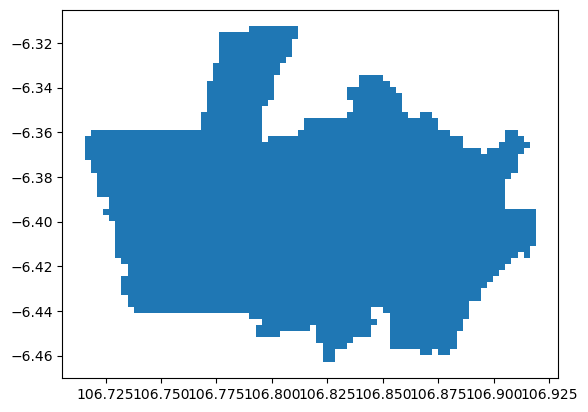

In [7]:
depok_school.plot()

In [32]:
from shapely.affinity import scale
import geopandas as gpd

In [12]:
coords = ((0., 0.), (0., 1.), (1., 1.), (1., 0.), (0., 0.))
polygon = Polygon(coords)

In [21]:
help(scale)

Help on function scale in module shapely.affinity:

scale(geom, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')
    Returns a scaled geometry, scaled by factors along each dimension.
    
    The point of origin can be a keyword 'center' for the 2D bounding box
    center (default), 'centroid' for the geometry's 2D centroid, a Point
    object or a coordinate tuple (x0, y0, z0).
    
    Negative scale factors will mirror or reflect coordinates.
    
    The general 3D affine transformation matrix for scaling is:
    
        / xfact  0    0   xoff \ 
        |   0  yfact  0   yoff |
        |   0    0  zfact zoff |
        \   0    0    0     1  /
    
    where the offsets are calculated from the origin Point(x0, y0, z0):
    
        xoff = x0 - x0 * xfact
        yoff = y0 - y0 * yfact
        zoff = z0 - z0 * zfact



In [22]:
scaled = scale(depok_school.iloc[0][0],5,5,5)

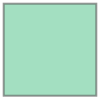

In [82]:
depok_school.iloc[10][0].centroid

In [25]:
depok_school.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
shaeply.affinit

In [86]:
scaled.centroid.y

-6.363069834551904

In [87]:
from shapely.geometry import Point
from shapely.affinity import translate

In [83]:
point = Point(depok_school.iloc[10][0].centroid) 

In [88]:
zel = translate(point, 1,1)

In [90]:
point.x

106.71981811523438

In [89]:
zel.centroid.x

107.71981811523438

In [85]:
point.centroid.y

-6.376717962536923

In [36]:
import pandas as pd

In [47]:
dict_shape={'Name': ['1'],'geometry':[scaled]}
scaled_df = gpd.GeoDataFrame(dict_shape, crs = depok_school.crs) 


In [53]:
scaled_df.centroid = depok_school.iloc[0][10]

C:\Users\MICKO\AppData\Local\Temp\ipykernel_10116\1213592262.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  scaled_df.centroid


0    POINT (106.71707 -6.36307)
dtype: geometry

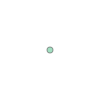

In [64]:
depok_school.iloc[10][0].centroid

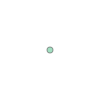

In [65]:
scaled_df.iloc[0][1].centroid

In [103]:
zel = depok_school.head(30)

In [63]:
scaled_df.iloc[0][1].centroid = depok_school.iloc[10][0].centroid

C:\Users\MICKO\AppData\Local\Temp\ipykernel_10116\121850707.py:1: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  scaled_df.iloc[0][1].centroid = depok_school.iloc[10][0].centroid


AttributeError: can't set attribute 'centroid'

### Geocode Capability

In [24]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp

import matplotlib.pyplot as plt


depok_obj = foi('Depok',crs=3857,zoom_level=17)
depok_school = depok_obj.area_of_interest({'power':'tower'})


depok_star = AStar(depok_school,'area',crs=depok_school.crs,custom_func = standar_heuristic )
depok_path = depok_star.run_instance("tanah baru depok","SMAN 2 Depok")
way_marker = depok_star.create_line()
way_path = lsp(way_marker[:,0],way_marker[:,1],)

ax = depok_school.plot(column="area",cmap='plasma')
plt.plot(way_path[:,0], way_path[:,1],color='blue')

loaded
loaded


ValueError: cannot join with no overlapping index names

In [14]:
sum(depok_star.path_finder)

28906

In [19]:
def standar_heuristic(current_attr,neig_attr):                                 
    x1,y1 = current_attr['position']
    x2,y2 = neig_attr['position']
    r1 = neig_attr['area']
    r = current_attr['area']
    return (((x2 - x1) ** 2 + (y2 - y1) ** 2)*r/r1)